## **Kernel SVM Classification with XGBoost**

##### Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv("./Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


##### Separating the features (training input parameters) from the target variables (model outputs).

In [2]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

##### Input Features (Independent)

In [3]:
print(X[0:2])

[[2.83950000e+04 6.10291000e+02 2.08178117e+02 1.73888747e+02
  1.19719142e+00 5.49812187e-01 2.87150000e+04 1.90141097e+02
  7.63922518e-01 9.88855999e-01 9.58027126e-01 9.13357755e-01
  7.33150600e-03 3.14728900e-03 8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 1.82734419e+02
  1.09735646e+00 4.11785251e-01 2.91720000e+04 1.91272751e+02
  7.83968133e-01 9.84985603e-01 8.87033637e-01 9.53860842e-01
  6.97865900e-03 3.56362400e-03 9.09850506e-01 9.98430331e-01]]


##### Output Variables (Dependent)

In [4]:
print(Y[0:2])

['SEKER' 'SEKER']


In [5]:
from sklearn.preprocessing import LabelEncoder
yLabelEncoder = LabelEncoder()
Y = yLabelEncoder.fit_transform(Y)

##### Splitting the dataset into training and testing set in the ratio of 80:20.

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size=0.75, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xTrain = xScale.fit_transform(xTrain)
xTest = xScale.transform(xTest)

##### Standardizing the dataset using standard scaler.

In [8]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xTrain = xScale.fit_transform(xTrain)
xTest = xScale.transform(xTest)

##### Initializing and fitting Support Vector Classifier with the training set.

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Applying the k-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
accuracyList = cross_val_score(estimator=model, X=xTrain, y=yTrain, cv=10)
print("Accuracy: {:.2f}%".format(accuracyList.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracyList.std()*100))

Accuracy: 92.37%
Standard Deviation: 0.67%


Applying Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV
params = [{'max_depth': [3, 5, 7,10], 'n_estimators': [100, 200, 300, 400, 500, 700]}]

gridSearch = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)
gridResult = gridSearch.fit(xTrain, yTrain)

In [12]:
bestAccuracy = gridResult.best_score_
bestParams = gridResult.best_params_
print("Best Accuracy:",bestAccuracy)
print("Best Accuracy:", bestParams)

Best Accuracy: 0.9245686658600757
Best Accuracy: {'max_depth': 3, 'n_estimators': 100}


##### Evaluating the model on the testing dataset. [Accuracy, Precision, Recall Score, F1 Score]

In [13]:
modelUpdated =gridResult.best_estimator_
modelUpdated.fit(xTrain, yTrain)
pred = modelUpdated.predict(xTest)

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

accuracy = accuracy_score(yTest, pred)
presicion = precision_score(yTest, pred, average='macro')
recall = recall_score(yTest, pred, average='macro')
f1Score = f1_score(yTest, pred, average='macro')
confusionMatrix = confusion_matrix(yTest, pred)

print("Metric Scores")
print("Accuracy: " + str(accuracy*100))
print("Precision: " + str(presicion*100))
print("Recall: " + str(recall*100))
print("f1 Score: " + str(confusionMatrix*100))

Metric Scores
Accuracy: 92.65354099324125
Precision: 94.17553626326516
Recall: 93.82704434384979
f1 Score: [[29400     0  1700     0   100   200   500]
 [    0 11100     0     0     0     0     0]
 [  900     0 39800     0   800   100   300]
 [    0     0     0 84100   200  1400  4800]
 [  100     0  1100   300 46600     0  1000]
 [    0     0     0   500     0 44800  1700]
 [  100     0   400  7600   700   500 59500]]


In [15]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(yTest, pred)
print(confusionMatrix)

[[294   0  17   0   1   2   5]
 [  0 111   0   0   0   0   0]
 [  9   0 398   0   8   1   3]
 [  0   0   0 841   2  14  48]
 [  1   0  11   3 466   0  10]
 [  0   0   0   5   0 448  17]
 [  1   0   4  76   7   5 595]]


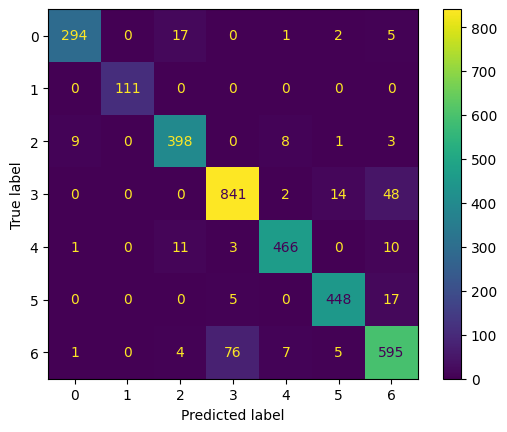

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
disp.plot()
plt.show()
